In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator



In [143]:
df = pd.read_csv('../data/jj.csv')
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [144]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


# Plot data with train/test split 

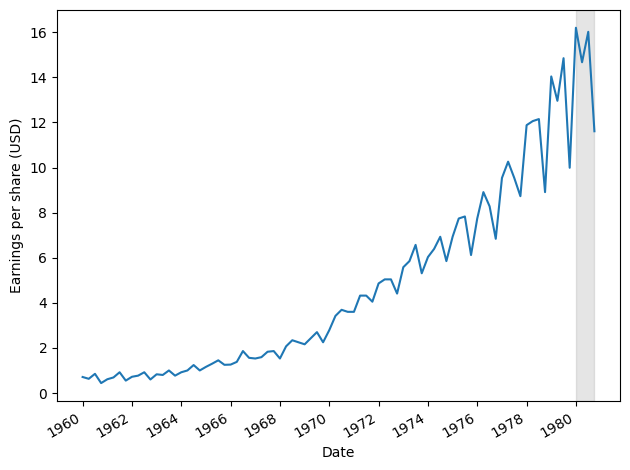

In [145]:
fig, ax = plt.subplots()

ax.plot(df["date"], df["data"])

ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share (USD)")

start_highlight_date = pd.to_datetime("1980-01-01")
end_hightlight_date = pd.to_datetime("1980-10-01")

ax.axvspan(start_highlight_date, end_hightlight_date, color="#808080", alpha=0.2)

ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig("figures/CH02_F01_peixeiro.png", dpi=300)

# Split to train/test 

In [146]:
train = df[:-4]
test = df[-4:]

# Predict historical mean 

In [147]:
historical_mean = np.mean(train['data'])
historical_mean

np.float64(4.308499987499999)

In [148]:
test.loc[:, 'pred_mean'] = historical_mean

test

,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [ ]:
def mape(y_true, y_pred): # mean absolute percentage error (MAPE)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [150]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

np.float64(70.00752579965119)

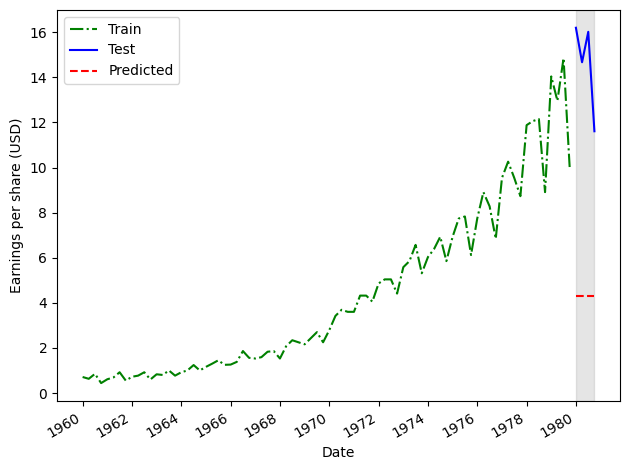

In [151]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

highlight_start_date = pd.to_datetime('1980-01-01')
highlight_end_date = pd.to_datetime('1980-10-01')

ax.axvspan(highlight_start_date, highlight_end_date, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.xaxis.set_major_locator(YearLocator(2)) # Major ticks every 2 years
ax.xaxis.set_major_formatter(DateFormatter('%Y')) # Format as 'YYYY'

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F06_peixeiro.png', dpi=300)

# Predict last year mean 

In [152]:
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

np.float64(12.96)

In [153]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

,date,data,pred_mean,pred__last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [154]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

np.float64(15.5963680725103)

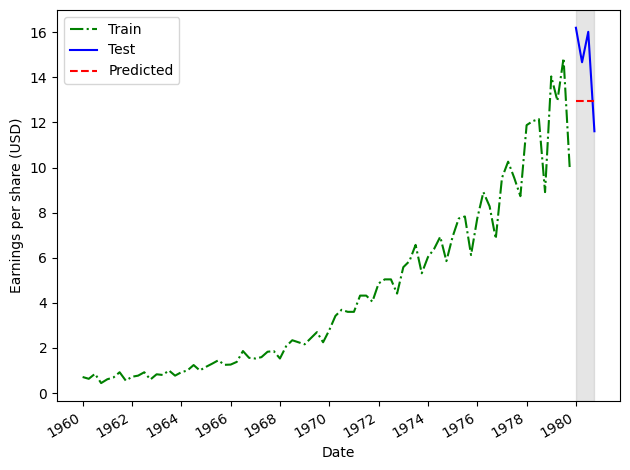

In [155]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

ax.axvspan(highlight_start_date, highlight_end_date, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F07_peixeiro.png', dpi=300)

# Predict last know value 

In [156]:
last = train['data'].iloc[-1]
last

np.float64(9.99)

In [157]:
test.loc[:, 'pred_last'] = last

test

,date,data,pred_mean,pred__last_yr_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [158]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

np.float64(30.457277908606535)

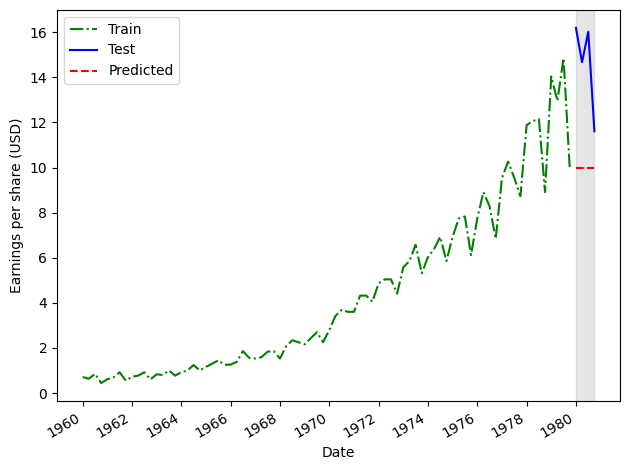

In [159]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

ax.axvspan(highlight_start_date, highlight_end_date, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F08_peixeiro.png', dpi=300)

# Naive seasonal forecast 

In [160]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

test

,date,data,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [161]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

np.float64(11.561658552433654)

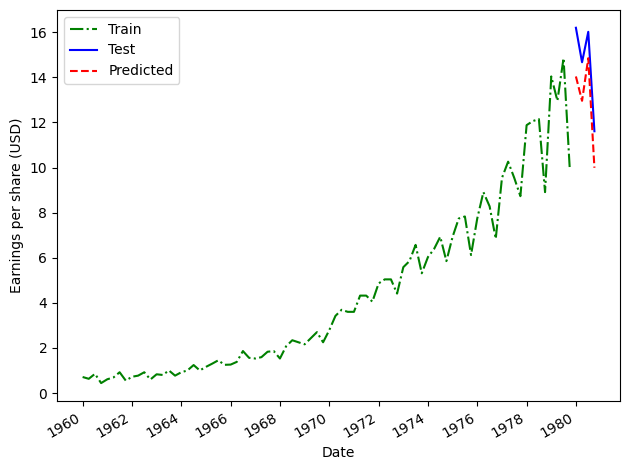

In [164]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')


ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.legend(loc=2)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH02_F09_peixeiro.png', dpi=300)

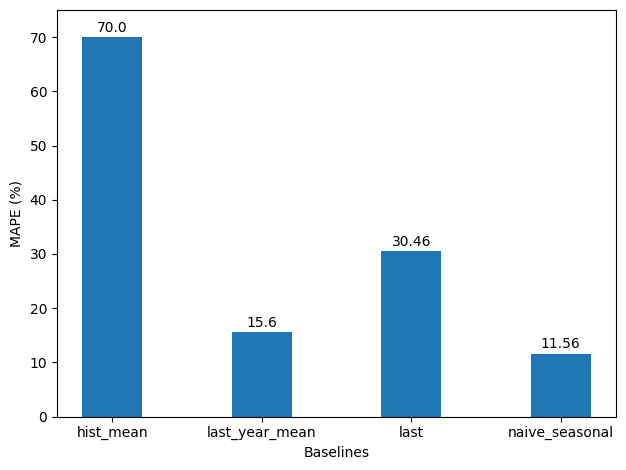

In [163]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

plt.savefig('figures/CH02_F10_peixeiro.png', dpi=300)